# ARIMA

## AR (Auto regressive)

In [1]:
# Ejemplo: generar los 10 primeros valores de un AR(1)

# Opcion 1: a_1, Y_0
a_1 = 2
Y_0 =1

serie_temporal = [Y_0]

for i in range(10):
    Y_t = a_1*Y_0
    serie_temporal.append(Y_t)
    Y_0 = Y_t
    
serie_temporal

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [3]:
# Opcion 2: Y_0, Y_1
Y_0 = 1
Y_1 = 2

a_1 = Y_1/Y_0
serie_temporal = [Y_0, Y_1]

for i in range(9):
    Y_t = a_1*Y_1
    serie_temporal.append(Y_t)
    Y_1 = Y_t
    
serie_temporal

[1, 2, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0]

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

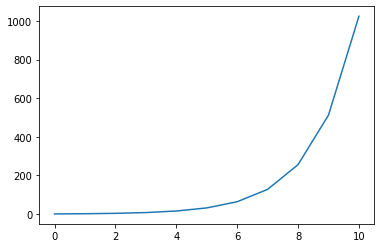

In [6]:
plt.plot(range(11), serie_temporal)

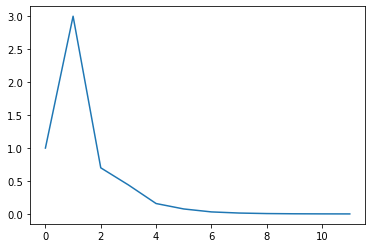

In [9]:
# Ejercio: Generar los 10 primeros valores de un modelo AR(2)

a_1 = 0.2
a_2 = 0.1
Y_0 = 1
Y_1 = 3

serie_temporal = [Y_0, Y_1]

for i in range(2, 12):
    Y_t = a_1*Y_1 + a_2*Y_0
    serie_temporal.append(Y_t)
    Y_0 = Y_1
    Y_1 = Y_t
    
plt.plot(range(len(serie_temporal)), serie_temporal)

In [12]:
import numpy as np

np.random.normal(0, 0.3, size=1)[0]

-0.11390478210973233

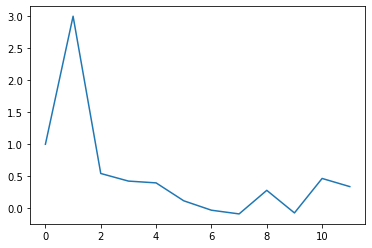

In [13]:
a_1 = 0.2
a_2 = 0.1
Y_0 = 1
Y_1 = 3

serie_temporal = [Y_0, Y_1]

for i in range(2, 12):
    Z_t = np.random.normal(0, 0.3, size=1)[0]
    Y_t = a_1*Y_1 + a_2*Y_0 + Z_t
    serie_temporal.append(Y_t)
    Y_0 = Y_1
    Y_1 = Y_t
    
plt.plot(range(len(serie_temporal)), serie_temporal)

In [14]:
# Ejercicio
# AR(1), a_1 = 1.1
# 1, 1.3, 1.2, 1.3, 1.5, 1.6, 1.6, 1.9

# Parte 1: calcular los proximos 3 valores
# Parte 2: 2.2, 2.3, 2.6 graficar las dos series (real, pred)

a_1 = 1.1
serie_temporal = [1, 1.3, 1.2, 1.3, 1.5, 1.6, 1.6, 1.9]

for i in range(len(serie_temporal), len(serie_temporal)+3):
    Y_t = a_1 * serie_temporal[i-1]
    serie_temporal.append(Y_t)

serie_temporal

[1, 1.3, 1.2, 1.3, 1.5, 1.6, 1.6, 1.9, 2.09, 2.299, 2.5289]

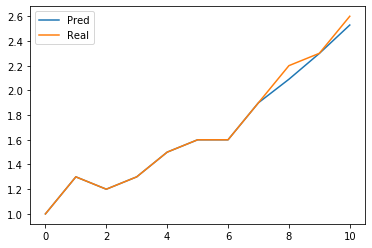

In [15]:
serie_temporal_real = [1, 1.3, 1.2, 1.3, 1.5, 1.6, 1.6, 1.9, 2.2, 2.3, 2.6]

plt.plot(range(len(serie_temporal)), serie_temporal, label = 'Pred')
plt.plot(range(len(serie_temporal_real)), serie_temporal_real, label = 'Real')
plt.legend()

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


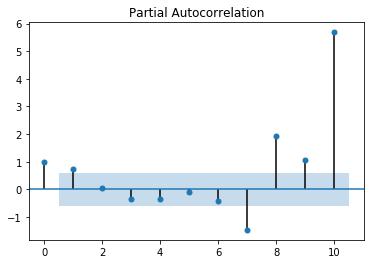

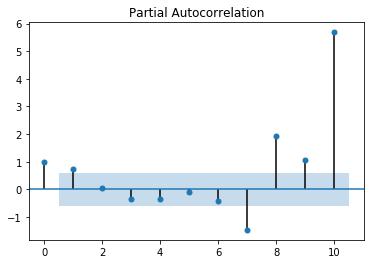

In [18]:
plot_pacf(np.array(serie_temporal_real))

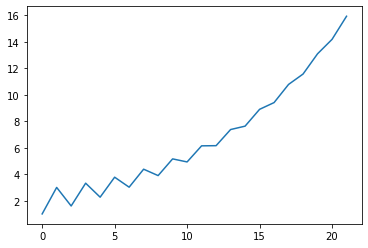

In [22]:
a_1 = 0.2
a_2 = 1
Y_0 = 1
Y_1 = 3

serie_temporal = [Y_0, Y_1]

for i in range(20):
    Y_t = a_1*Y_1 + a_2*Y_0
    serie_temporal.append(Y_t)
    Y_0 = Y_1
    Y_1 = Y_t
    
plt.plot(range(len(serie_temporal)), serie_temporal)

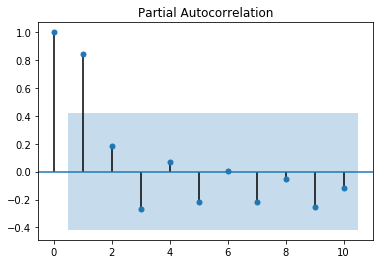

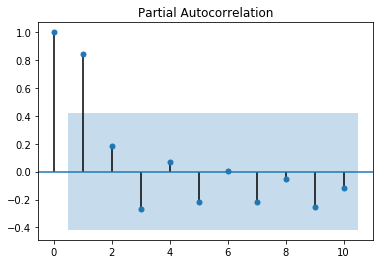

In [24]:
plot_pacf(np.array(serie_temporal), lags=10)

## MA (moving average)

In [30]:
b_1 = 2
errores = [0.1, -0.3, 0.0, -0.2, 0.5, 0.1, -0.3, -0.4, 0.3, 0.1]

serie_temporal = []

for i in range(1, 10):
    Y_t = errores[i] + b_1*errores[i-1]
    serie_temporal.append(Y_t)
    
serie_temporal

[-0.09999999999999998,
 -0.6,
 -0.2,
 0.09999999999999998,
 1.1,
 -0.09999999999999998,
 -1.0,
 -0.5,
 0.7]

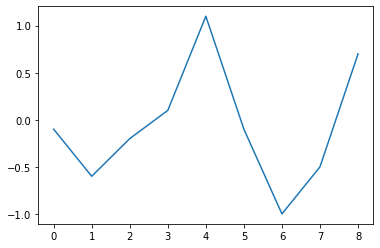

In [31]:
plt.plot(range(len(serie_temporal)), serie_temporal)

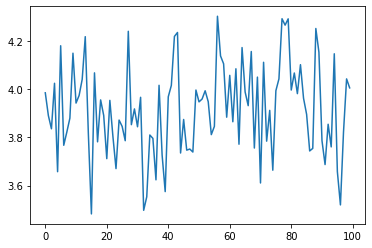

In [39]:
# Ejercicio
# generear los 100 primeros valores de una MA(2), con parametros b_1, b_2
# los errores siguen una normal mu=3, sigma=0.2

b_1 = 0.2
b_2 = 0.1
errores = np.random.normal(3, 0.2, 102)

serie_temporal = []

for i in range(2, 102):
    Y_t = errores[i] + b_1*errores[i-1] + b_2*errores[i-2]
    serie_temporal.append(Y_t)
    
plt.plot(range(len(serie_temporal)), serie_temporal)

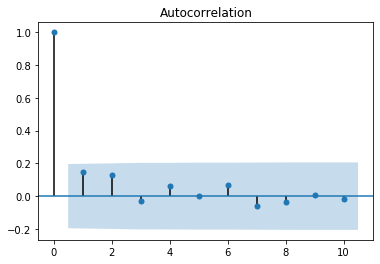

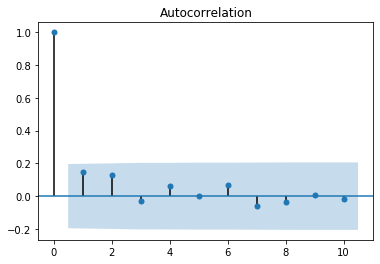

In [40]:
plot_acf(np.array(serie_temporal), lags=10)

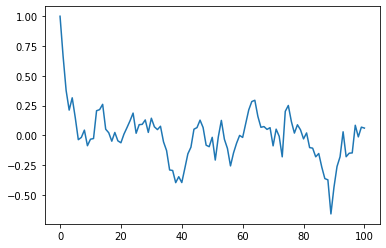

In [41]:
# 100 primeros valores de un ARMA (1,2)
# MA normal(0, 0.1)

# graficos ACF PACF

a_1 = 0.5
b_1 = 0.2
b_2 = 0.1
Y_0 = 1
errores = np.random.normal(0, 0.1, size=102)

serie_temporal = [Y_0]

for i in range(2, 102):
    Y_t = a_1*Y_0 + errores[i] + b_1*errores[i-1] + b_2*errores[i-2]
    serie_temporal.append(Y_t)
    Y_0 = Y_t
    
plt.plot(range(len(serie_temporal)), serie_temporal)

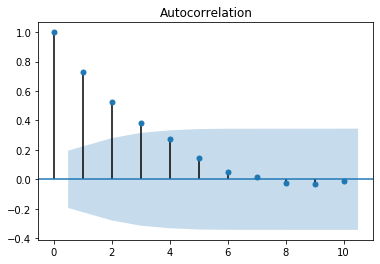

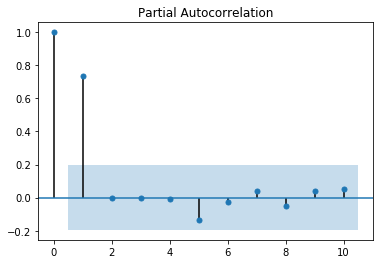

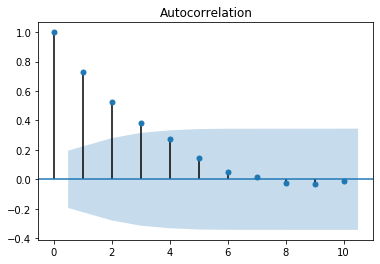

In [43]:
plot_pacf(np.array(serie_temporal), lags=10)
plot_acf(np.array(serie_temporal), lags=10)

## Todo junto

In [45]:
# Descomposición

from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


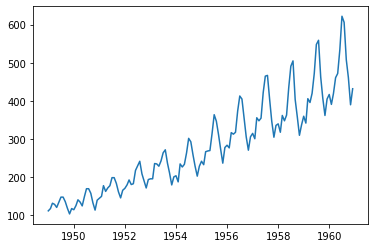

In [52]:
df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month', header=0)
plt.plot(df['Passengers'])

In [53]:
TEST_SIZE = 24
train, test = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], df.shape[0]))

In [56]:
dec = seasonal_decompose(train, model='multiplicative')

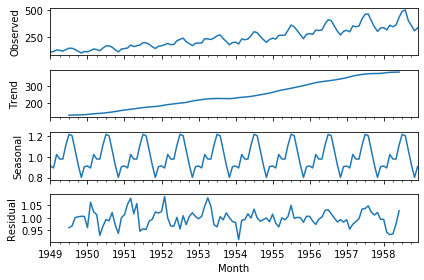

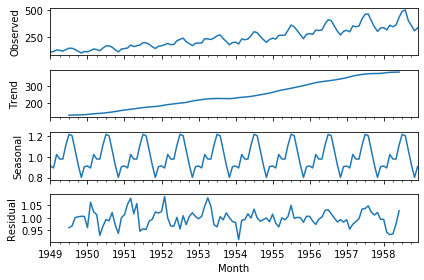

In [57]:
dec.plot()

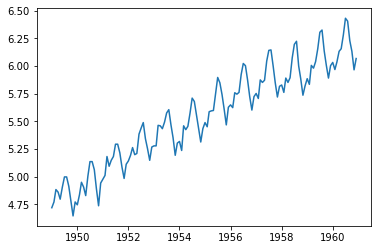

In [59]:
# Diferenciación

df_log = np.log(df['Passengers'])
plt.plot(df_log)

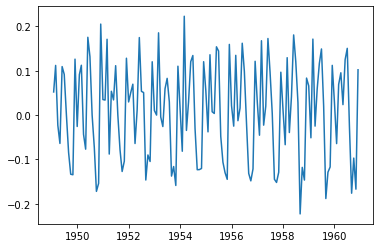

In [62]:
df_diff = df_log.diff()
df_diff.dropna(inplace = True)
plt.plot(df_diff)

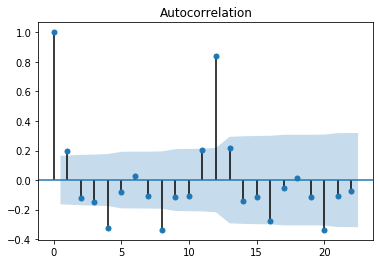

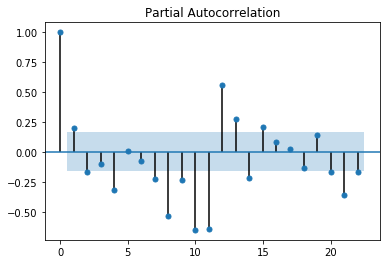

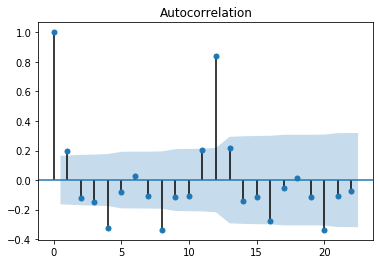

In [63]:
plot_pacf(df_diff)
plot_acf(df_diff)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


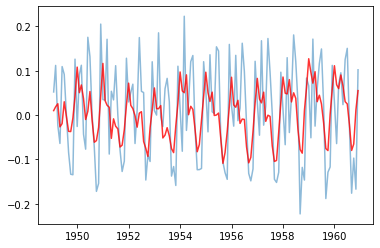

In [66]:
# ARIMA (1/2, 1, 1)
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order=(2,1,1))
results = model.fit()
plt.plot(df_diff, alpha=0.5)
plt.plot(results.fittedvalues, color='red', alpha=0.8)

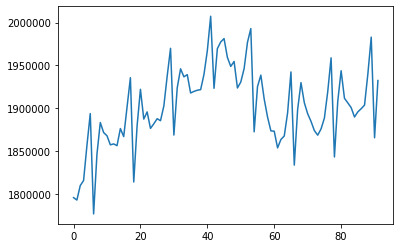

In [65]:
df = pd.read_csv('datasets/Jobs.csv')
plt.plot(df['Total Filled Jobs'])

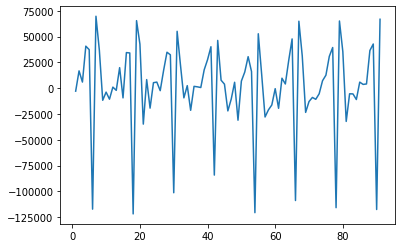

In [67]:
df_diff = df['Total Filled Jobs'].diff()
df_diff.dropna(inplace = True)
plt.plot(df_diff)

In [ ]:
# Ejercicio: PACF, ACF --> Fitar ARIMA

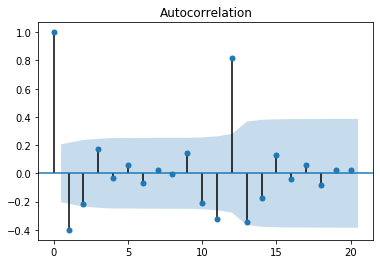

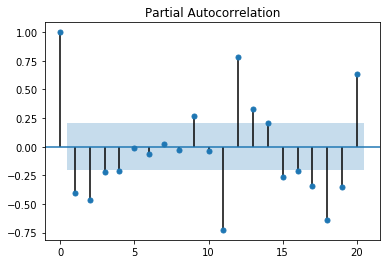

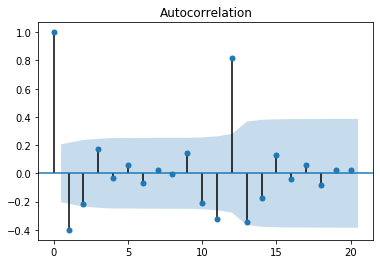

In [68]:
plot_pacf(df_diff)
plot_acf(df_diff)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


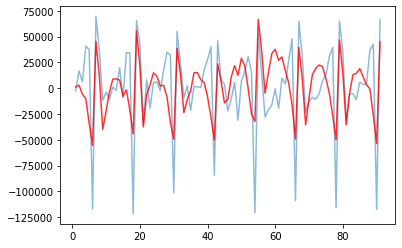

In [69]:
model = ARIMA(df_diff, order=(2,0,1))
results = model.fit()
plt.plot(df_diff, alpha=0.5)
plt.plot(results.fittedvalues, color='red', alpha=0.8)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


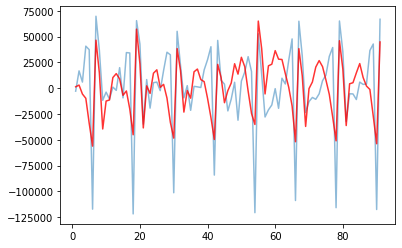

In [70]:
model = ARIMA(df_diff, order=(4,0,1))
results = model.fit()
plt.plot(df_diff, alpha=0.5)
plt.plot(results.fittedvalues, color='red', alpha=0.8)